#  1、基础链之LLMCahin的使用

In [2]:
from langchain.chains.llm import LLMChain
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
import os
import dotenv

# 加载环境变量
dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

# 1、初始化语言大模型
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)

# 2、提供提示词模板
prompt_template = PromptTemplate.from_template(
	template="你是一个数学高手，请帮我解答以下数学问题：{question}"
)

chain = LLMChain(
	llm=llm,
	prompt=prompt_template,
)
response = chain.invoke(
	{"question": "什么是勾股定理？"}
)
print(response)

{'question': '什么是勾股定理？', 'text': '勾股定理是一个基本的几何定理，适用于直角三角形。它表明，在一个直角三角形中，斜边（最长边）平方等于其他两条边（直角边）平方和。用数学公式表示为：\n\n\\[ c^2 = a^2 + b^2 \\]\n\n其中：\n- \\( c \\) 是斜边的长度，\n- \\( a \\) 和 \\( b \\) 是直角边的长度。\n\n这个定理可以用来计算直角三角形的边长，也可以用来判断三角形是否为直角三角形。如果已知三角形的三条边长 \\( a, b, c \\)，可以检查是否满足 \\( c^2 = a^2 + b^2 \\) 来判断它是否为直角三角形。'}


In [3]:
# 举例2：使用ChatPromptTemplate及参数verbose的演示
from langchain.chains.llm import LLMChain
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
import os
import dotenv

# 加载环境变量
dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

# 1、初始化语言大模型
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)

# 2、提供提示词模板
chat_prompt_template = ChatPromptTemplate.from_messages(
	[
		("system", "你是一个数学高手，请帮我解答以下数学问题："),
		("human", "帮我解决如下的数学问题：{question}")
	]
)

chain = LLMChain(
	llm=llm,
	prompt=chat_prompt_template,
	verbose=True,  #显示执行过程中的日志信息
)
response = chain.invoke(
	{"question": "什么是勾股定理？"}
)
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
System: 你是一个数学高手，请帮我解答以下数学问题：
Human: 帮我解决如下的数学问题：什么是勾股定理？

> Finished chain.
{'question': '什么是勾股定理？', 'text': '勾股定理是一个关于直角三角形的基本定理。它表明，在一个直角三角形中，直角所对的边（即斜边）的平方等于另外两条边的平方和。用数学公式表示为：\n\n\\[ c^2 = a^2 + b^2 \\]\n\n其中，\\( c \\) 是斜边的长度，\\( a \\) 和 \\( b \\) 是直角三角形的其他两条边的长度。\n\n例如，如果一条直角三角形的两条直角边分别为 3 和 4，那么可以使用勾股定理计算斜边的长度：\n\n\\[ c^2 = 3^2 + 4^2 = 9 + 16 = 25 \\]\n\n因此，斜边 \\( c = \\sqrt{25} = 5 \\)。\n\n勾股定理在几何、代数和许多实际应用中都非常重要。'}


## 2、顺序链之 SimpleSequentialChain
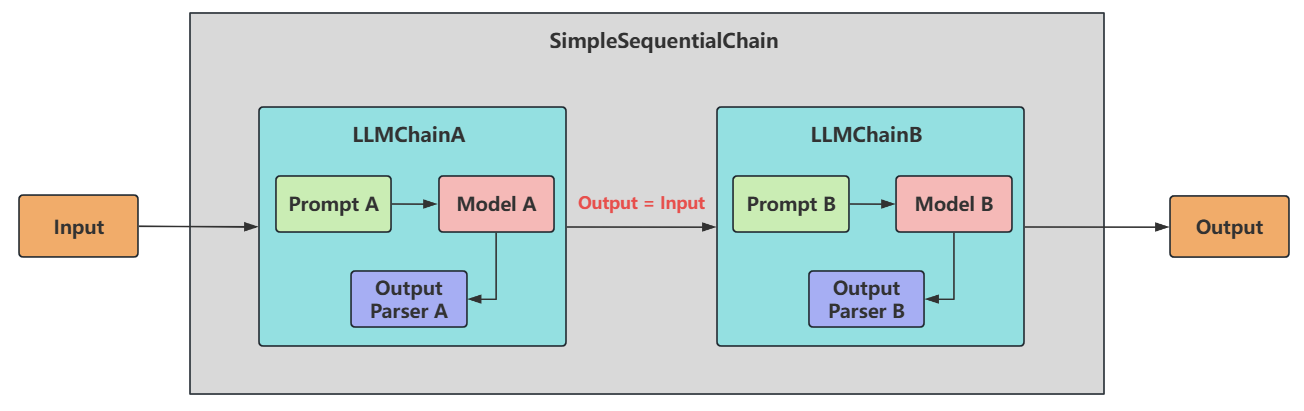

In [4]:
# 举例1
from langchain.chains import LLMChain
from langchain.chains.llm import LLMChain
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
import os
import dotenv

# 加载环境变量
dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

# 初始化语言大模型
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)
chainA_template = ChatPromptTemplate.from_messages(
	[
		("system", "你是一位精通各领域知识的知名教授"),
		("human", "请你尽可能详细的解释一下：{knowledge}"),
	]
)

chainA_chains = LLMChain(llm=llm,
                         prompt=chainA_template,
                         verbose=True
                         )
# chainA_chains.invoke({"knowledge": "什么是LangChain？"})

In [5]:
from langchain_core.prompts import ChatPromptTemplate

chainB_template = ChatPromptTemplate.from_messages([
	("system", "你非常善于提取文本中的重要信息，并做出简短的总结"),
	("human", "这是针对一个提问的完整的解释说明内容：{description}"),
	("human", "请你根据上述说明，尽可能简短的输出重要的结论，请控制在20个字以内"),
])
chainB_chains = LLMChain(llm=llm,
                         prompt=chainB_template,
                         verbose=True
                         )

In [7]:
# 导入SimpleSequentialChain
from langchain.chains import SimpleSequentialChain

# 在chains参数中，按顺序传入LLMChain A 和LLMChain B
full_chain = SimpleSequentialChain(chains=[chainA_chains, chainB_chains], verbose=True)
# 说明：针对SimpleSequentialChain，唯一传入的参数的变量名是：input
full_chain.invoke({"input": "什么是爱情？"})



> Entering new SimpleSequentialChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: 你是一位精通各领域知识的知名教授
Human: 请你尽可能详细的解释一下：什么是爱情？

> Finished chain.
爱情是一个复杂而深刻的情感，涉及情感、心理、生理和社会等多个层面。可以从以下几个方面来详细解释爱情的含义：

### 1. 情感层面
爱情是一种强烈的情感体验，通常包括对他人的亲密感、依恋感和热情。爱情可以带来快乐、满足、幸福感，同时也可能伴随焦虑、嫉妒和失落等负面情绪。爱情的情感体验往往是多样的和动态的，随着时间和经历的变化而变化。

### 2. 心理层面
在心理学上，爱情可以被视为一种复杂的情感结构，涉及以下几个方面：
- **吸引**：初始的吸引力通常源于生理特征、个性魅力和共同利益等。
- **依恋**：随着关系的发展，依恋感增强，个体之间建立起深厚的情感联结。
- **承诺**：爱情关系的稳定性往往与双方的承诺程度有关。承诺是维持关系的重要因素，它涉及到未来的计划和共同生活的愿景。

### 3. 生理层面
爱情的生理机制也得到了广泛的研究。激素（如多巴胺、催产素和肾上腺素）在爱情中起着重要作用：
- **多巴胺**：与快乐和奖励相关，通常在恋爱初期产生强烈的愉悦感。
- **催产素**：也被称为“爱情激素”，与亲密关系和依恋感相关，能够增强伴侣之间的情感联系。
- **肾上腺素**：在恋爱初期可导致心跳加速、出汗等生理反应，带来刺激和兴奋感。

### 4. 社会文化层面
爱情在不同文化和社会中有着不同的表现和理解。在西方文化中，爱情常常与浪漫、激情和个人自由相联系，而在一些东方文化中，爱情可能更多地与责任、家庭和社会期望相结合。此外，社会对爱情的看法也随着历史的变迁而发生变化。

### 5. 爱情的类型
心理学家往往将爱情划分为不同的类型，例如：
- **浪漫爱情**：以激情和吸引为主，往往在关系初期表现突出。
- **友谊爱情**：强调深厚的情感联系和相互理解，通常基于长期的友谊。
- **伴侣爱情**：建立在深厚的信任与承诺基础上，适合长期关系。
- **无私爱情**（或称为博爱）：关注他人的

{'input': '什么是爱情？', 'output': '爱情是复杂情感，涉及情感、心理、生理和社会文化等多层面。'}

In [11]:
# 举例2
# 1.导入相关包
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
from langchain.chains import SimpleSequentialChain

# 2.创建大模型实例
llm = ChatOpenAI(model="gpt-4o-mini")

# 3.定义一个给剧名写大纲的LLMChain
template1 = """你是个剧作家。给定剧本的标题，你的工作就是为这个标题写一个大纲。
Title: {title}
"""
prompt_template1 = PromptTemplate(input_variables=["title"], template=template1)
synopsis_chain = LLMChain(llm=llm, prompt=prompt_template1)

# 4.定义给一个剧本大纲写一篇评论的LLMChain
template2 = """你是《纽约时报》的剧评家。有了剧本的大纲，你的工作就是为剧本写一篇评论
剧情大纲:
{synopsis}
"""
prompt_template2 = PromptTemplate(input_variables=["synopsis"], template=template2)
review_chain = LLMChain(llm=llm, prompt=prompt_template2)

# 5.定义一个完整的链按顺序运行这两条链
#(verbose=True:打印链的执行过程)
overall_chain = SimpleSequentialChain(
	chains=[synopsis_chain, review_chain],
	verbose=True
)

# 6.调用完整链顺序执行这两个链
review = overall_chain.invoke("隐入尘烟")

# 7.打印结果
print(review)



> Entering new SimpleSequentialChain chain...
标题: 隐入尘烟

### 大纲

**背景设定:**
故事发生在一个被战火蹂躏的小村庄，周围的环境荒凉而破败。村庄的历史渊源深厚，但因为战争的持续，昔日的繁荣已成往事。故事背景展现了人们在战乱中挣扎求生的生存状态，同时探讨了历史遗留的伤痛和家庭的羁绊。

**主要角色:**
1. **李浩** - 主人公，一个年轻的村民，曾是一名教师。战争使他失去了家人，他对未来感到绝望。
2. **小娟** - 李浩的青梅竹马，也是村里唯一的医务工作者，努力拯救村民的生命，心中怀有强烈的责任感。
3. **阿彪** - 村子的守护者，曾是军人，性格粗犷，内心却充满对家乡的热爱。
4. **晓雨** - 流亡者，来自另一个被战争摧毁的地方，带着未被抹去的伤痕，揭示战争带来的苦难和对人性的影响。

**第一幕: 战乱的阴影**
- 村庄的清晨，描绘一幅战争前的宁静景象。李浩和小娟在一起，展现他们的青涩爱情和美好憧憬。
- 突如其来的空袭打破了宁静，剧烈的轰炸声震撼着一切，村民们四散逃离，李浩失去了家人。
- 村庄被迫封锁，揭示生存与死亡的艰难选择。

**第二幕: 逃离与希望**
- 战争的持续让村庄陷入绝望，李浩和小娟决定组织村民们寻找避难所，试图逃离战火。
- 在逃亡过程中，阿彪带领一小部分武装人员保护着村民，晓雨的出现为他们带来了新的希望，她分享了自己逃亡的故事，激励大家坚持下去。
- 他们共同经历了各种考验，包括外敌的进攻、内部分歧以及生存资源的短缺，加深了角色之间的关系。

**第三幕: 回归与救赎**
- 在数次冲突后，李浩意识到，逃避永远不是解决问题的方法。他开始召集村民，重新建设家园。
- 小娟发现她的医术能够帮助村民，成为社区的支柱，推动大家团结起来。
- 阿彪面对内心的挣扎，决定用自己的方式守护家园，不再只是一名武士，而成为真正的领袖。
- 故事的高潮是在一场决定生死的战斗中，村庄的命运悬而未决，角色们在关键时刻展现出人性中的光辉。

**第四幕: 隐入尘烟**
- 战斗结束后，村庄经过重建慢慢恢复了生机。虽然许多村民选择了离开，但李浩和小娟决定留下，继续守护这片养育他们的土地。
- 结尾展现村庄的日出，用“隐入尘烟”象征着过去的伤痛被时间抚平，新的希望在悄然绽放。


## 3、顺序链之 SequentialChain
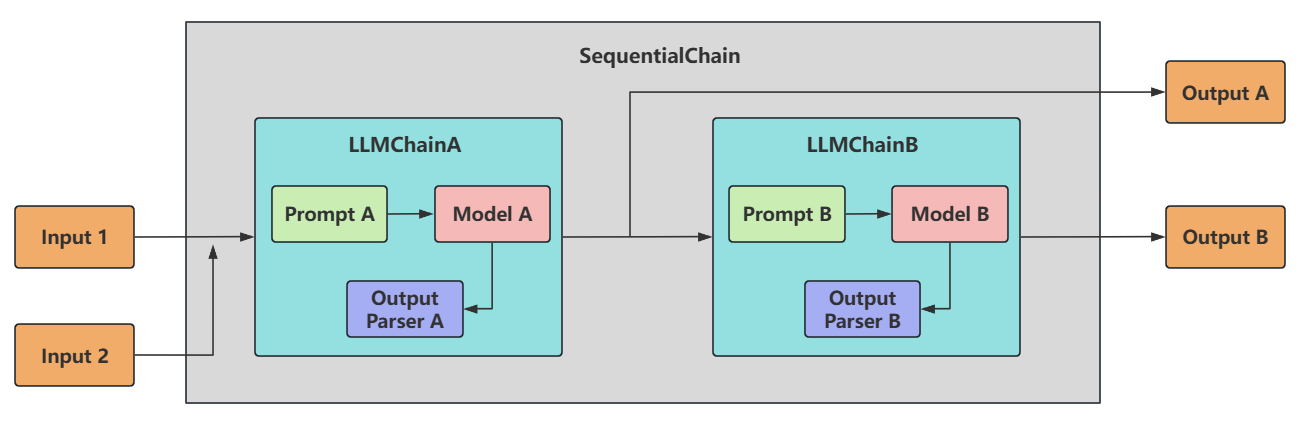

In [12]:
# 举例1
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import SequentialChain
from langchain_openai import ChatOpenAI
from langchain.chains import LLMChain
import dotenv
import os

# 加载环境变量
dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

# 创建大模型实例
llm = ChatOpenAI(model="gpt-4o-mini")

schainA_template = ChatPromptTemplate.from_messages(
	[
		("system", "你是一位精通各领域知识的知名教授"),
		("human", "请你先尽可能详细的解释一下：{knowledge}，并且{action}")
	]
)
schainA_chains = LLMChain(llm=llm,
                          prompt=schainA_template,
                          verbose=True,
                          output_key="schainA_chains_key"
                          )

In [13]:
schainB_template = ChatPromptTemplate.from_messages(
	[
		("system", "你非常善于提取文本中的重要信息，并做出简短的总结"),
		("human", "这是针对一个提问完整的解释说明内容：{schainA_chains_key}"),
		("human", "请你根据上述说明，尽可能简短的输出重要的结论，请控制在100个字以内"),
	]
)
schainB_chains = LLMChain(llm=llm,
                          prompt=schainB_template,
                          verbose=True,
                          output_key='schainB_chains_key'
                          )

In [16]:
# 一定要声明出两个变量：input_variables和output_variables
Seq_chain = SequentialChain(
	chains=[schainA_chains, schainB_chains],
	input_variables=["knowledge", "action"],
	output_variables=["schainA_chains_key", "schainB_chains_key"],
	verbose=True
)
response = Seq_chain.invoke(
	{
		"knowledge": "中国足球为什么踢得烂",
		"action": "举一个实际的例子"
	}
)
print(response)



> Entering new SequentialChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: 你是一位精通各领域知识的知名教授
Human: 请你先尽可能详细的解释一下：中国足球为什么踢得烂，并且举一个实际的例子

> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
System: 你非常善于提取文本中的重要信息，并做出简短的总结
Human: 这是针对一个提问完整的解释说明内容：中国足球在过去的几十年里面临着多方面的问题，导致其整体水平相对较低，表现不尽如人意。以下是几方面的原因以及一个具体的例子：

### 1. **基础设施与青训体系不足**
尽管近年来中国在足球场地和设施建设上投入了不少资金，但整体的青训体系仍然相对薄弱。许多有潜力的青年球员没有得到系统性的培训，缺乏高水平的教练与训练资源。

### 2. **管理与体制问题**
中国足球的管理体制往往比较复杂，各种利益纠葛使得资源分配和决策过程效率低下。尤其是在职业联赛中，俱乐部的运营常常受限于短期利益，而不是长远发展。

### 3. **文化与心理因素**
在中国，足球并不是最受欢迎的运动，许多家长和孩子更倾向于选择学业和其他职业道路。此外，球员在重大比赛中的心理素质较弱，常常在关键时刻表现不佳。

### 4. **引进外援与依赖现象**
中国足球联赛在引进外援方面投入了大量资金，俱乐部往往依赖外籍球员的能力，使得本土球员缺乏锻炼和成长的机会。这种现象限制了本土球员的发展。

### 实际例子
一个实际的例子是中国国家队在2018年世界杯预选赛中的表现。在小组赛阶段，中国队在多场关键比赛中表现不佳，例如与叙利亚队的比赛，中国队在主场以0-1失利。这场失利不仅反映了队伍在技战术上的不足，也暴露了球员在比赛心理素质和应对压力上的欠缺。

总的来说，中国足球的兴起需要从基础做起，需要强有力的青训体系、稳定的管理体制以及文化观念的转变，这样才能逐步提高整体水平。
Human: 请你根据上述说明，尽可能简短的输出重要的结论，请控制在100个字以内

> Finished chain.

In [18]:
# 举例2
# 1.导入相关包
from langchain.chains.llm import LLMChain
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain.chains import SequentialChain

# 创建大模型实例
llm = ChatOpenAI(model="gpt-4o-mini")

# 2.定义任务链一
#chain 1 任务：翻译成中文
first_prompt = PromptTemplate.from_template("把下面内容翻译成中文:\n\n{content}")
chain_one = LLMChain(
	llm=llm,
	prompt=first_prompt,
	verbose=True,
	output_key="Chinese_Review",
)

# 3.定义任务链二
#chain 2 任务：对翻译后的中文进行总结摘要 input_key是上一个chain的output_key
second_prompt = PromptTemplate.from_template("用一句话总结下面内容:\n\n{Chinese_Review}")
chain_two = LLMChain(
	llm=llm,
	prompt=second_prompt,
	verbose=True,
	output_key="Chinese_Summary",
)

# 4.定义任务链三
# chain 3 任务：识别语言
third_prompt = PromptTemplate.from_template("下面内容是什么语言:\n\n{Chinese_Summary}")
chain_three = LLMChain(
	llm=llm,
	prompt=third_prompt,
	verbose=True,
	output_key="Language",
)

# 5.定义任务链四
#chain 4 任务:针对摘要使用指定语言进行评论 input_key是上一个chain的output_key
fourth_prompt = PromptTemplate.from_template(
	"请使用指定的语言对以下内容进行评论:\n\n内容: {Chinese_Summary}\n\n语言: {Language}"
)
chain_four = LLMChain(
	llm=llm,
	prompt=fourth_prompt,
	verbose=True,
	output_key="Comment",
)

# 6.总链
#overall 任务：翻译成中文->对翻译后的中文进行总结摘要->智能识别语言->针对摘要使用指定语言进行评论
overall_chain = SequentialChain(
	chains=[chain_one, chain_two, chain_three, chain_four],
	verbose=True,
	input_variables=["content"],
	output_variables=["Chinese_Review", "Chinese_Summary", "Language", "Comment"],
)
#读取文件
# read file
content = "Recently, we welcomed several new team members who have made significant contributions to their respective departments. I would like to recognize Jane Smith (SSN: 049-45-5928) for her outstanding performance in customer service. Jane has consistently received positive feedback from our clients. Furthermore, please remember that the open enrollment period for our employee benefits program is fast approaching. Should you have any questions or require assistance, please contact our HR representative, Michael Johnson (phone: 418-492-3850, email: michael.johnson@example.com)."

response = overall_chain.invoke(content)
print(response)
print()
print(response["Comment"])




> Entering new SequentialChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
把下面内容翻译成中文:

Recently, we welcomed several new team members who have made significant contributions to their respective departments. I would like to recognize Jane Smith (SSN: 049-45-5928) for her outstanding performance in customer service. Jane has consistently received positive feedback from our clients. Furthermore, please remember that the open enrollment period for our employee benefits program is fast approaching. Should you have any questions or require assistance, please contact our HR representative, Michael Johnson (phone: 418-492-3850, email: michael.johnson@example.com).

> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
用一句话总结下面内容:

最近，我们迎来了几位新团队成员，他们在各自的部门中做出了重要贡献。我想特别表彰简·史密斯（SSN: 049-45-5928）在客户服务方面的出色表现。简始终获得客户的积极反馈。此外，请记住，我们的员工福利计划开放报名期即将来临。如有任何问题或需要帮助，请联系我们的HR代表迈克尔·约翰逊（电话：418-492-3850，电子邮件：michael.johnson@example.com）。

> Finished chain.



## 4、数学链 LLMMathChain (了解)

In [21]:
from langchain.chains import LLMMathChain
import os
import dotenv
from langchain_openai import ChatOpenAI
from langchain.chains import LLMChain

dotenv.load_dotenv()
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY1")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")
# 创建大模型实例
llm = ChatOpenAI(model="gpt-4o-mini")
# 创建链
llm_math = LLMMathChain.from_llm(llm)
# 执行链
res = llm_math.invoke("10 ** 3 + 100的结果是多少？")
print(res)

{'question': '10 ** 3 + 100的结果是多少？', 'answer': 'Answer: 1100'}


## 5、路由链 RouterChain (了解)
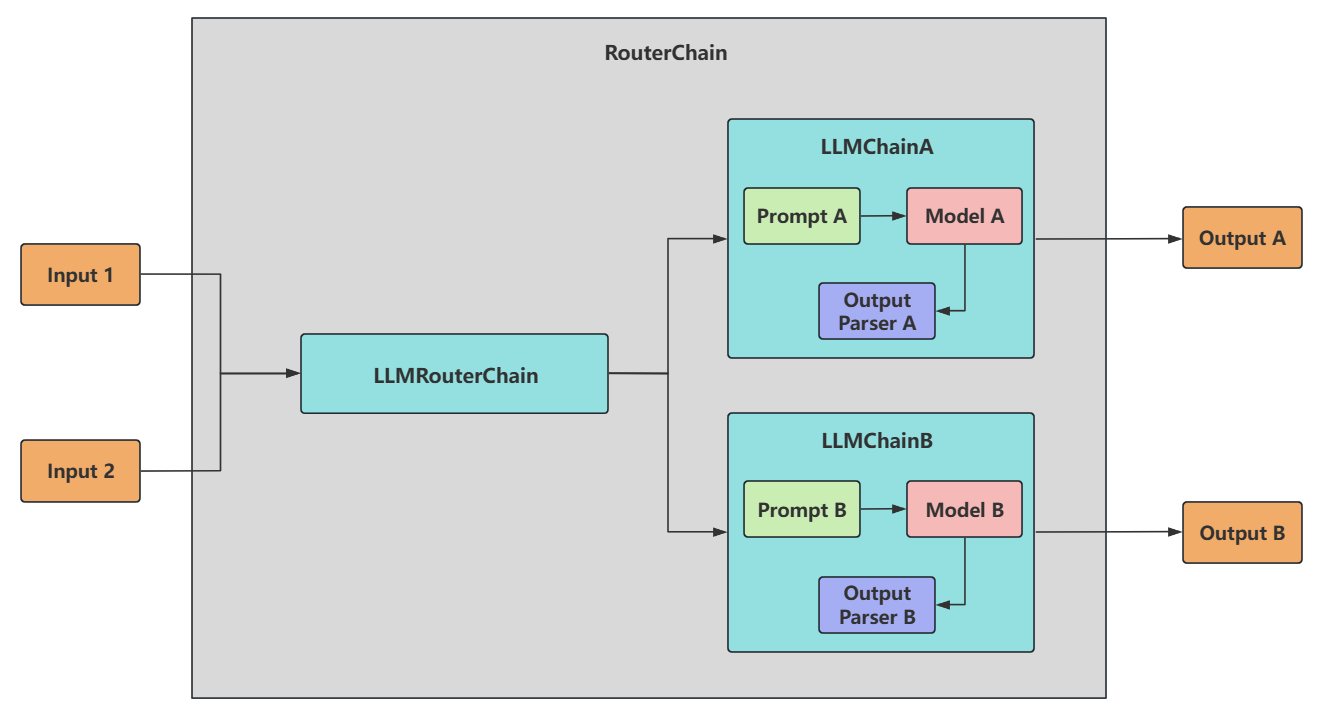

## 6、文档链 StuffDocumentsChain(了解)

In [28]:
#1.导入相关包
from langchain.chains import StuffDocumentsChain
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.document_loaders import PyPDFLoader
from langchain.chat_models import ChatOpenAI

# 2.加载PDF
loader = PyPDFLoader("../../../examples/广电套餐合集.pdf")
#3.定义提示词
prompt_template = """对以下文字做简洁的总结:
{text}
简洁的总结:"""
# 4.定义提示词模版
prompt = PromptTemplate.from_template(prompt_template)
# 5.定义模型
llm = ChatOpenAI(model="gpt-4o-mini")
# 6.定义LLM链
llm_chain = LLMChain(llm=llm, prompt=prompt)
# 7.定义文档链
stuff_chain = StuffDocumentsChain(
	llm_chain=llm_chain,
	document_variable_name="text",  # 在 prompt 模板中，文档内容应该用哪个变量名表示
)  #document_variable_name="text" 告诉 StuffDocumentsChain 把合并后的文档内容填充到 {text}变量中"。
# 8.加载pdf文档
docs = loader.load()
# 9.执行链
res = stuff_chain.invoke(docs)
#print(res)
print(res["output_text"])

中国广电提供多种手机套餐，主要内容如下：

1. **套餐类型**：
   - **双百套餐 2.0系列**：包括MAX、PLUS和基础套餐，均长期有效，包含通用流量和通话时长。
   - **祥龙卡、升龙卡、惠民年卡**等，均长期有效。
   
2. **流量与通话时长**：
   - 主要流量套餐为100G至192G/月，通话时长从100分钟到192分钟不等。

3. **充送活动**：
   - 不同套餐有不同的充送优惠，例如充300元送150元，充100元送50元等，赠送的金额在后续月份逐渐递增。

4. **赠费期**：
   - 各套餐赠费期在19元至34元/月不等，标准资费则在29元至39元/月。

5. **预计年费**：
   - 年费从238元到418元不等，具体预算取决于选择的套餐。

6. **其他权益**：
   - 部分套餐附带彩铃包、随心选权益等附加服务，且流量可结转至下月。

7. **办理方式**：
   - 可通过指定链接或二维码进行套餐办理，并需确认所用手机型号的适配性。

总结而言，中国广电套餐多样，适合不同需求的用户，且具备灵活的优惠与服务。
